In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("./cleaned/usdrub.csv")
data.drop(columns=["Unnamed: 0"], inplace=True)

In [3]:
series = data['close']

In [4]:
data.sample(10)

,date,open,high,low,close,vol
1018,2017-08-18,59.2189,59.50810,58.8263,58.9320,171666
1649,2019-05-11,65.1949,65.21750,65.1027,65.1369,33
1987,2020-05-27,70.8011,71.47731,70.5890,70.8506,974699
2662,2022-07-27,57.5000,61.55000,57.5000,59.3575,1005
842,2017-02-23,58.0948,58.14320,57.4600,57.7160,181871
892,2017-04-14,56.2810,56.38820,55.9351,56.0360,186558
1238,2018-03-26,57.2239,57.51240,56.7717,57.1562,331226
540,2016-04-25,66.8573,67.11670,64.6524,66.2704,493868
2034,2020-07-21,71.3286,71.44740,70.4030,70.5840,881960
2096,2020-10-01,77.6825,77.77130,76.6530,77.0140,1075542


In [5]:
data['date'].min(), data['date'].max()

('2014-02-06', '2024-01-24')

In [6]:
data['month'] = data['date'].apply(lambda x: str(x)[:8]+'01')

In [7]:
data

,date,open,high,low,close,vol,month
0,2014-02-06,34.8934,34.9337,34.5848,34.7102,7669,2014-02-01
1,2014-02-07,34.7300,34.8300,34.5300,34.7500,10,2014-02-01
2,2014-05-05,35.7747,35.8635,35.6700,35.7100,1564,2014-05-01
3,2014-10-07,39.7165,39.9751,39.6550,39.8873,376,2014-10-01
4,2014-10-08,39.8959,40.1560,39.6877,39.9721,901,2014-10-01
...,...,...,...,...,...,...,...
3117,2024-01-19,89.4213,89.5250,87.1000,88.0500,7931,2024-01-01
3118,2024-01-21,88.0500,88.0500,88.0500,88.0500,2,2024-01-01
3119,2024-01-22,88.0500,88.5650,86.9250,87.9932,2622,2024-01-01
3120,2024-01-23,87.9000,88.8839,86.8250,88.6173,7594,2024-01-01


In [8]:
plt.style.use('dark_background')

In [9]:
aa = data[['month', 'close']].groupby('month').mean()
bb = data[['month', 'close']].groupby('month').median()

aa = aa.join(bb, lsuffix='_mean', rsuffix='_median')

In [10]:
aa['diff'] = aa['close_mean'] - aa['close_median']

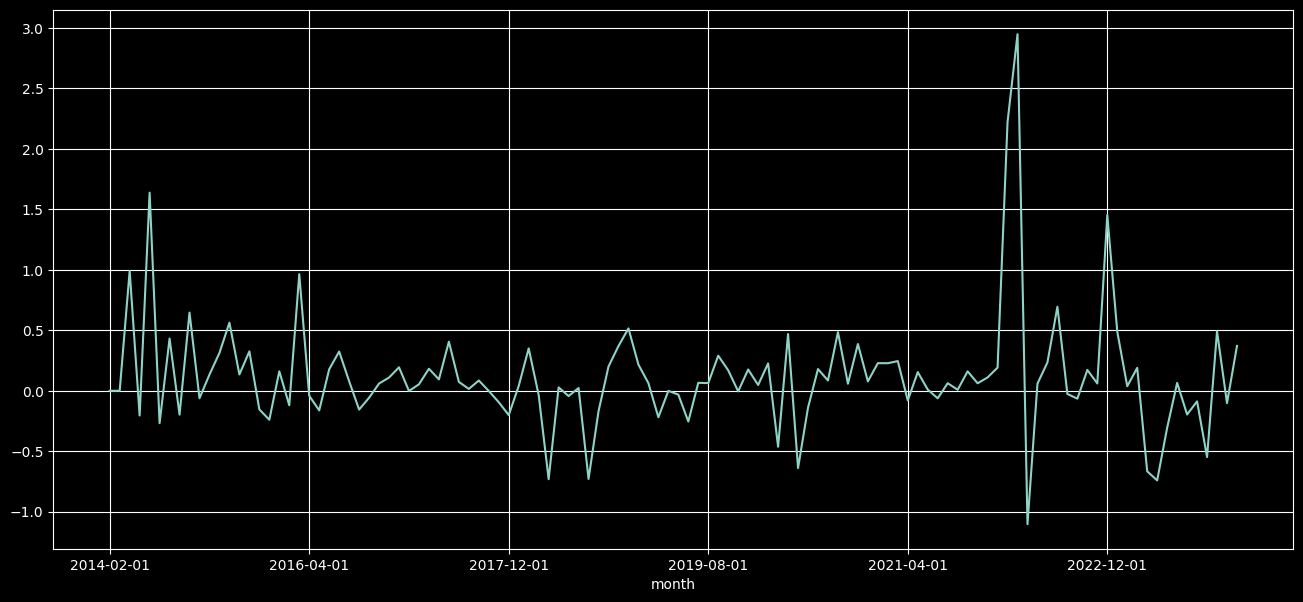

In [11]:
ax = aa['diff'].plot(kind='line', figsize=(16,7), grid=True)

<Axes: xlabel='month'>

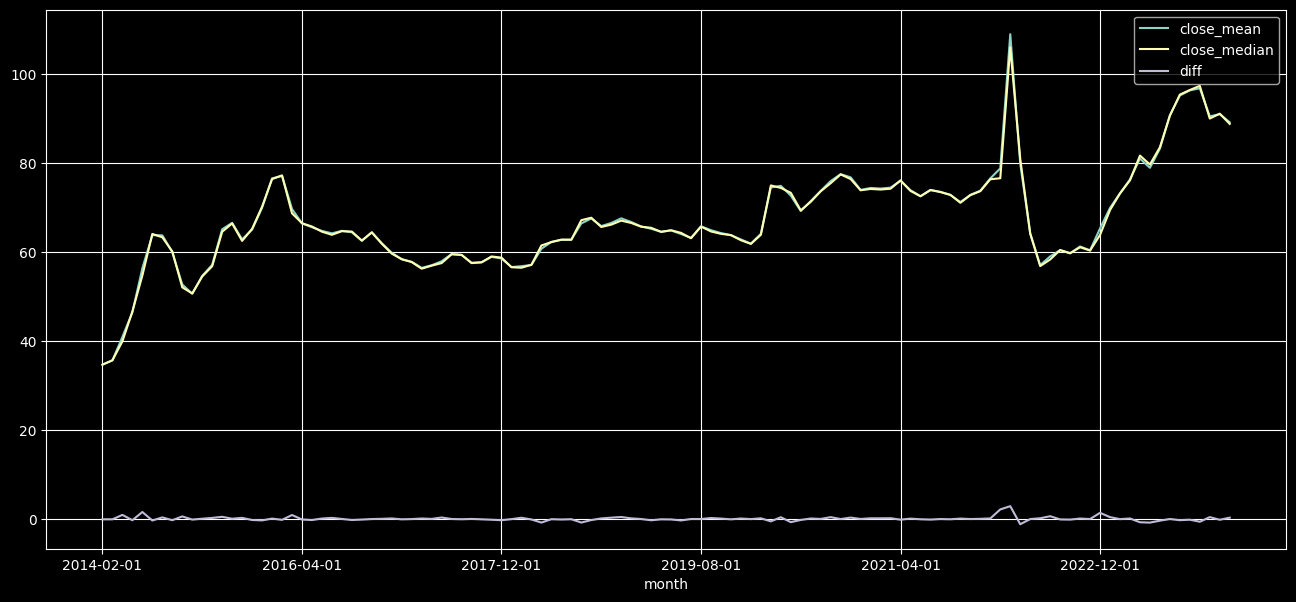

In [12]:
aa.plot(kind='line', figsize=(16,7), grid=True)

ValueError: 'locs' must be 1D with shape (N,), but your input has shape ()

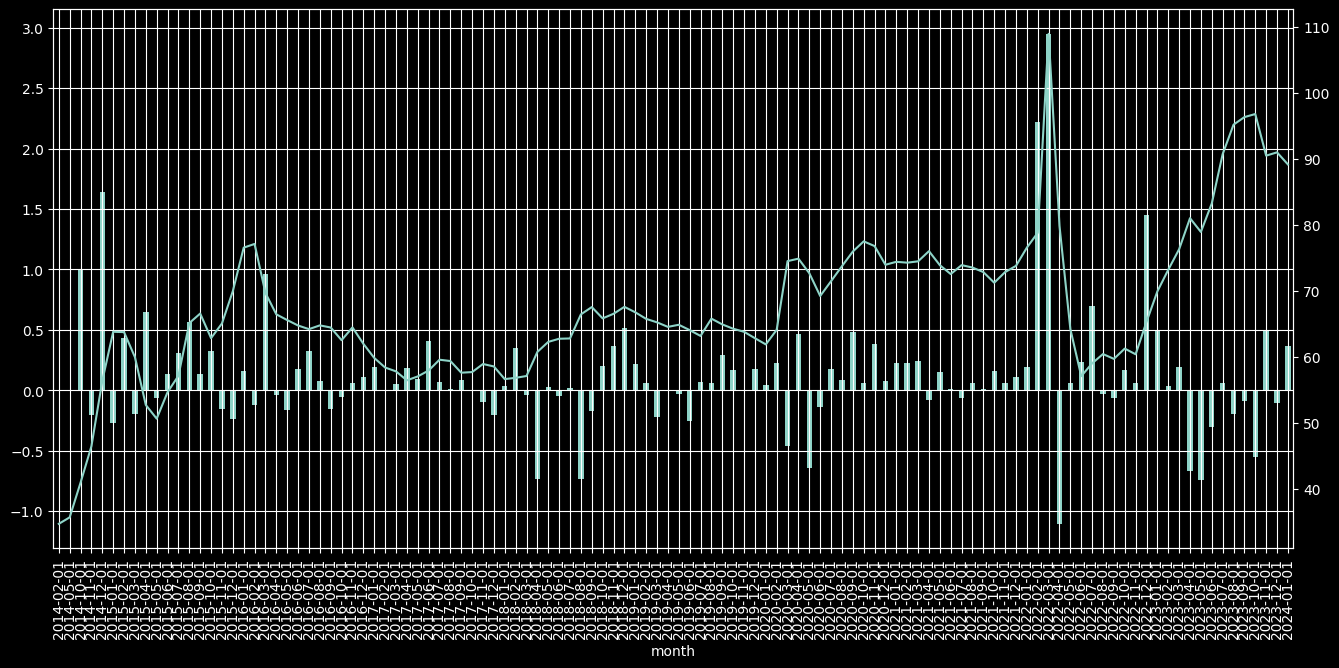

In [13]:
ax = aa['diff'].plot(kind='bar', figsize=(16,7), grid=True)
ax2 = plt.twinx()
aa['close_mean'].plot(kind='line', ax=ax2)
plt.xticks(45)

<Axes: xlabel='month'>

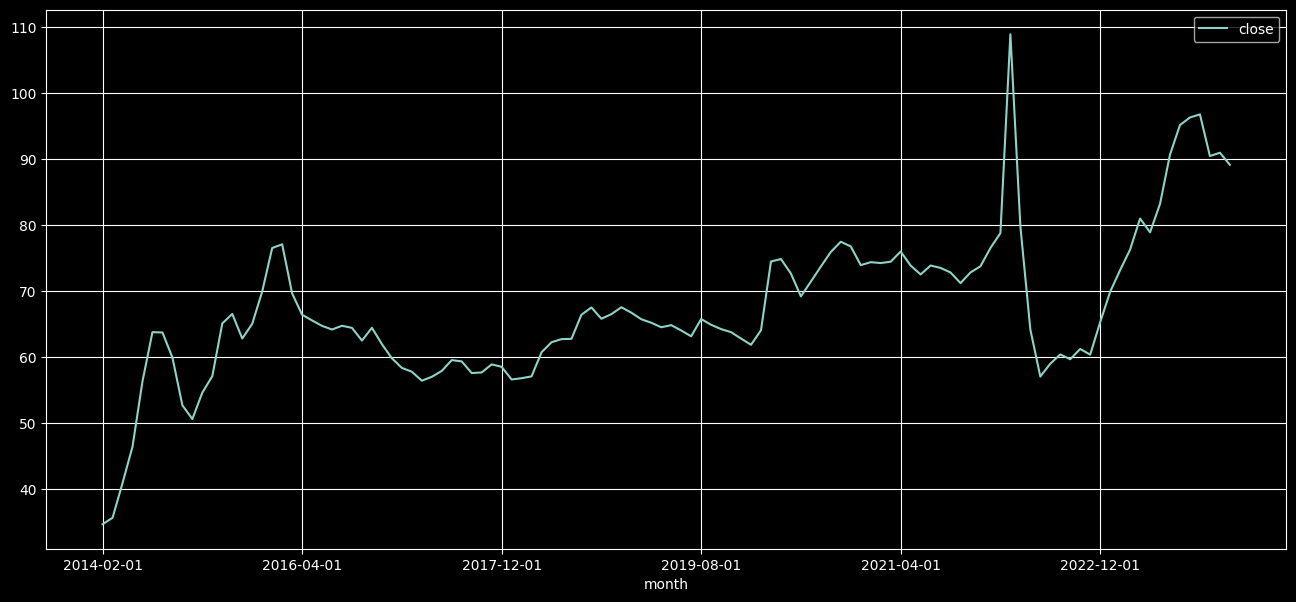

In [14]:
data[['month', 'close']].groupby('month').mean().plot(kind='line', grid=True, figsize=(16,7))

In [15]:
from spectrum import Periodogram

In [16]:
data.shape

(3122, 7)

In [51]:
import numpy as np

In [54]:
space = np.linspace(-20,20,1000)

In [61]:
cc = np.cos([x for x in space])+np.ranwhidom.randn(len(space))*5

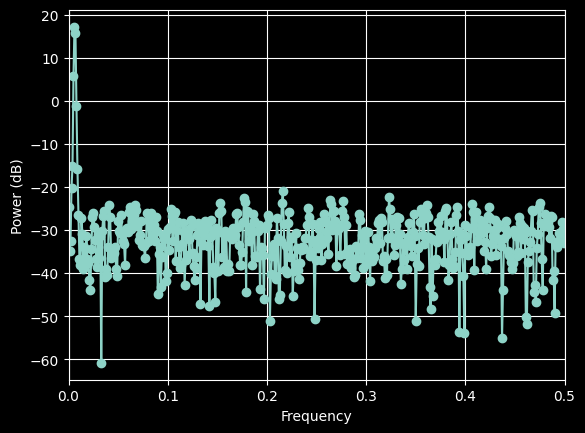

In [64]:

cc = np.cos([x for x in space])+np.random.randn(len(space))*0.05
p = Periodogram(cc)
p.run()
p.plot(marker='o') 

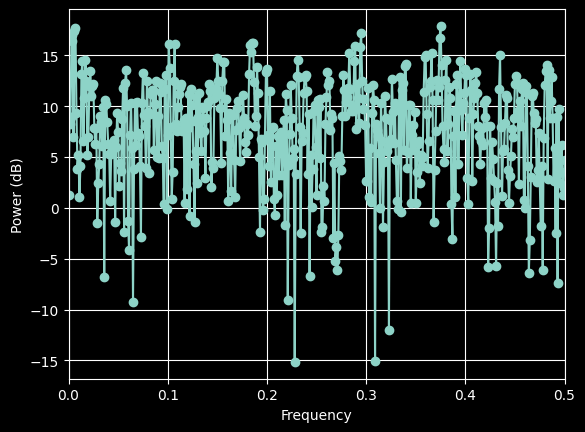

In [63]:
cc = np.cos([x for x in space])+np.random.randn(len(space))*5
p = Periodogram(cc)
p.run()
p.plot(marker='o') 

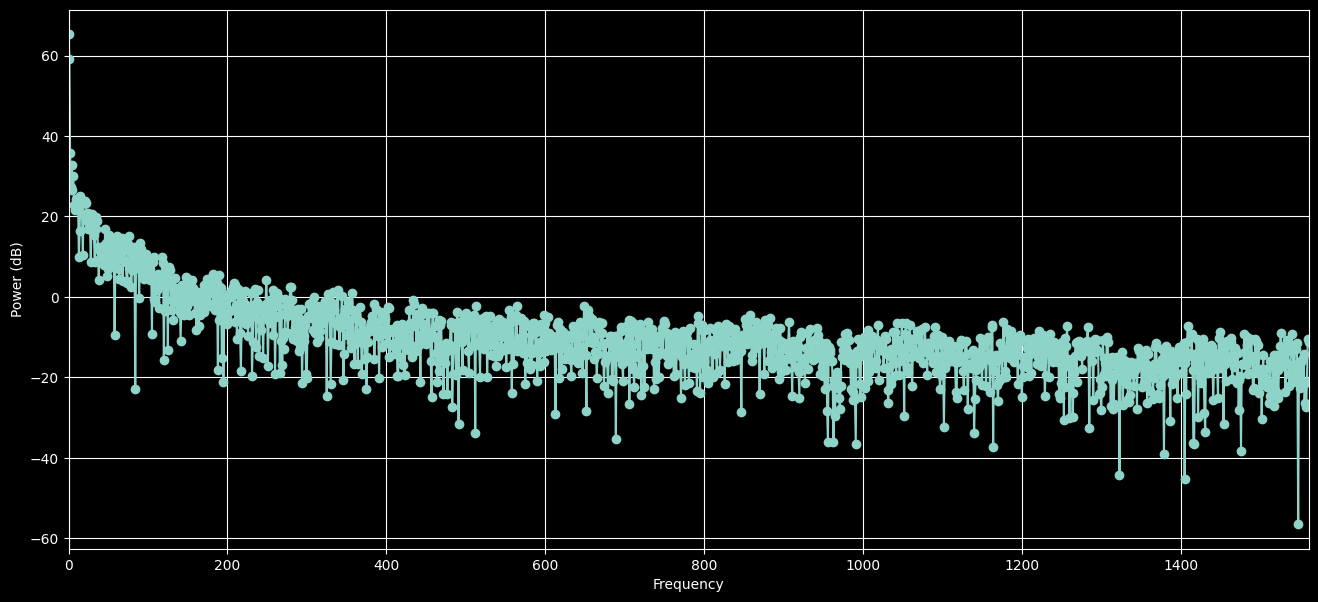

In [19]:
plt.figure(figsize=(16,7))
p.plot(marker='o') 

In [20]:
diff = series.diff().dropna()

In [21]:
p1 = Periodogram(diff, sampling=3121)

In [22]:
p1.run()

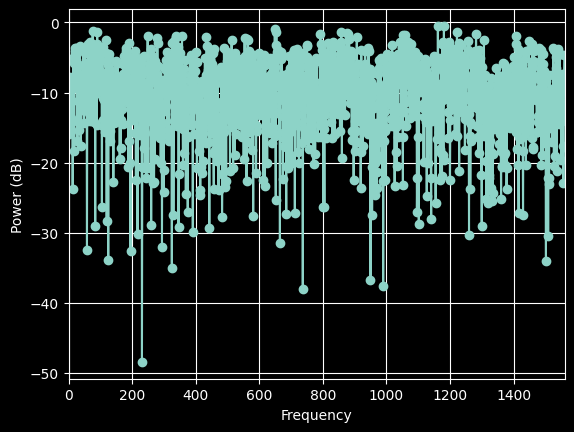

In [23]:
p1.plot(marker='o') 

In [24]:
ma = series.rolling(200).mean().dropna()

In [25]:
data

,date,open,high,low,close,vol,month
0,2014-02-06,34.8934,34.9337,34.5848,34.7102,7669,2014-02-01
1,2014-02-07,34.7300,34.8300,34.5300,34.7500,10,2014-02-01
2,2014-05-05,35.7747,35.8635,35.6700,35.7100,1564,2014-05-01
3,2014-10-07,39.7165,39.9751,39.6550,39.8873,376,2014-10-01
4,2014-10-08,39.8959,40.1560,39.6877,39.9721,901,2014-10-01
...,...,...,...,...,...,...,...
3117,2024-01-19,89.4213,89.5250,87.1000,88.0500,7931,2024-01-01
3118,2024-01-21,88.0500,88.0500,88.0500,88.0500,2,2024-01-01
3119,2024-01-22,88.0500,88.5650,86.9250,87.9932,2622,2024-01-01
3120,2024-01-23,87.9000,88.8839,86.8250,88.6173,7594,2024-01-01


In [26]:
# pip install git+https://github.com/scls19fr/pandas-helper-calc

In [28]:
import pandas_helper_calc

In [30]:
data['close_der'] = data['close'].calc.derivative()


In [31]:
data['close_rolling_50'] = data['close'].rolling(50).mean()
data['close_rolling_200'] = data['close'].rolling(200).mean()
data['close_rolling_500'] = data['close'].rolling(500).mean()

In [33]:
data['close_rolling_50_der'] = data['close_rolling_50'].calc.derivative()
data['close_rolling_200_der'] = data['close_rolling_200'].calc.derivative()
data['close_rolling_500_der'] = data['close_rolling_500'].calc.derivative()

<Axes: >

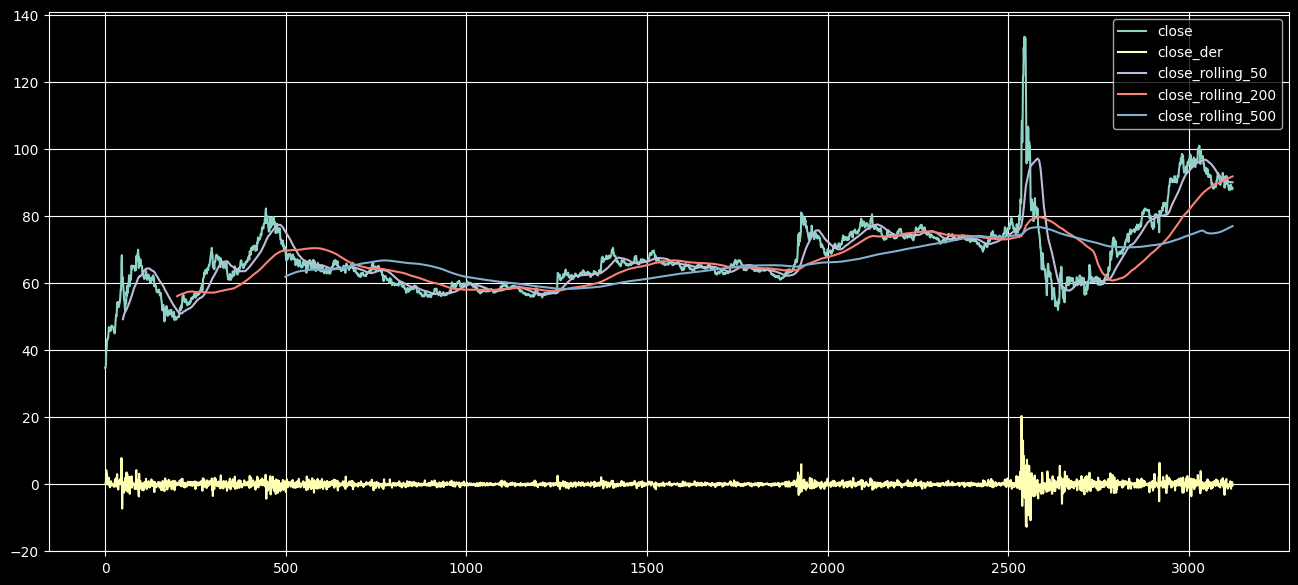

In [32]:
data[['close', 'close_der', 'close_rolling_50', 'close_rolling_200', 'close_rolling_500']].plot(kind='line', figsize=(16,7), grid=True)

In [37]:
data.sample(10)

,date,open,high,low,close,vol,month,close_der,close_rolling_50,close_rolling_200,close_rolling_500,close_rolling_50_der,close_rolling_200_der,close_rolling_500_der
2334,2021-07-06,73.4642,74.80393,73.10750,74.4903,1066400,2021-07-01,1.0265,73.099668,74.333456,72.412025,0.017342,-0.014015,0.020402
2498,2022-01-13,74.5290,76.68600,74.39400,76.2575,781084,2022-01-01,1.7295,74.232042,73.117822,73.936383,0.064316,0.013742,0.015388
956,2017-06-17,57.7243,57.76000,57.50200,57.7600,34,2017-06-01,0.1361,57.025796,58.533431,63.216468,0.021354,-0.035251,-0.039026
1919,2020-03-09,72.0318,76.21290,71.90526,74.4604,60988,2020-03-01,2.4180,64.069020,64.090368,64.958143,0.268928,0.057255,0.015682
823,2017-02-04,58.9515,59.04100,58.83870,59.0062,2835,2017-02-01,0.0547,60.253126,63.080116,66.192942,-0.054286,-0.019079,-0.013736
1136,2017-12-14,58.5805,59.09500,58.41500,58.8521,204877,2017-12-01,0.2521,58.846488,58.539632,59.925513,0.022372,0.007748,-0.013569
1362,2018-07-28,62.6169,62.79170,62.61690,62.7750,33,2018-07-01,0.2308,62.909868,60.005236,58.838861,0.009752,0.029173,0.008603
2306,2021-06-03,73.1588,73.34455,72.93900,73.2130,1037513,2021-06-01,0.0567,74.714526,75.019582,71.918485,-0.077900,-0.019189,0.018506
2666,2022-08-01,61.2850,64.05000,59.50000,60.7500,1113,2022-08-01,-0.7500,57.827916,74.955074,74.180504,-0.037200,-0.066349,-0.030086
1522,2019-01-04,68.7380,69.47950,67.47090,67.5415,312906,2019-01-01,-1.1684,67.292260,65.996175,61.653119,0.033850,0.021050,0.016984


<Axes: >

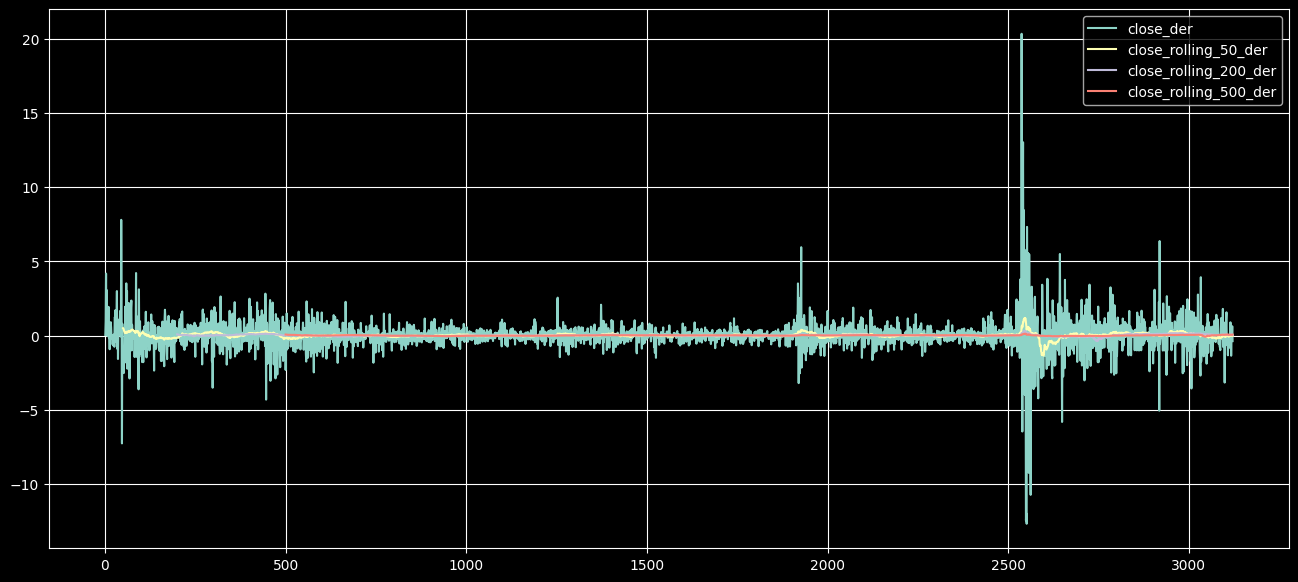

In [38]:
data[['date', 'close_der', 'close_rolling_50_der', 'close_rolling_200_der', 'close_rolling_500_der']]\
  .plot(kind='line', grid=True, figsize=(16,7))

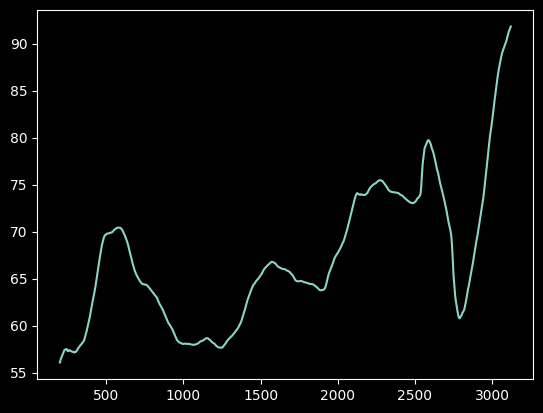

In [39]:
plt.plot(ma)

In [40]:
ma.shape

(2923,)

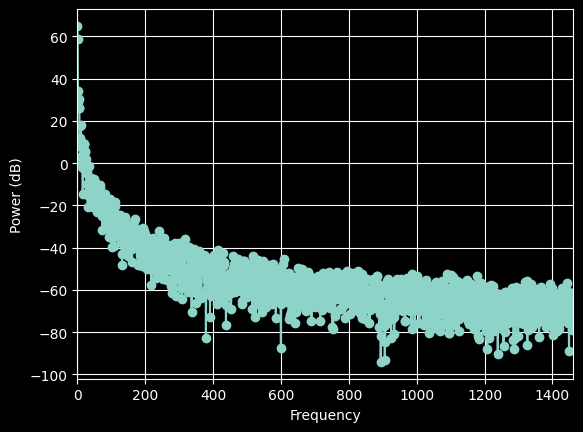

In [41]:
p2 = Periodogram(ma, sampling=2923)
p2.run()
p2.plot(marker='o') 

In [46]:
ma[800:2000]

999     58.050838
1000    58.050653
1001    58.055580
1002    58.060294
1003    58.063740
          ...    
2194    74.193247
2195    74.226428
2196    74.260624
2197    74.299176
2198    74.336555
Name: close, Length: 1200, dtype: float64

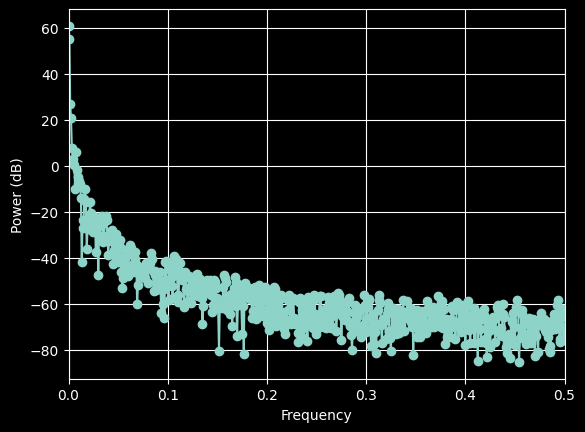

In [48]:
p2 = Periodogram(ma[800:2000])
p2.run()
p2.plot(marker='o') 

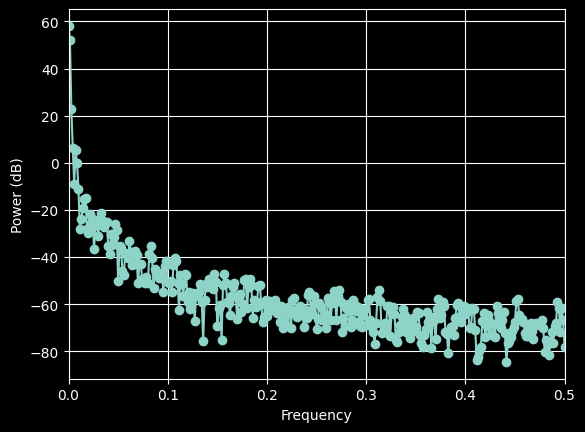

In [49]:
p2 = Periodogram(ma[800:1500])
p2.run()
p2.plot(marker='o') 

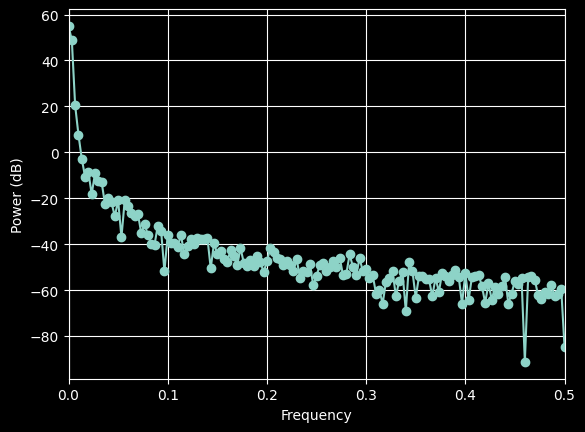

In [50]:
p2 = Periodogram(ma[2500:2800])
p2.run()
p2.plot(marker='o') 

In [38]:
ma_diff = ma.diff().dropna()

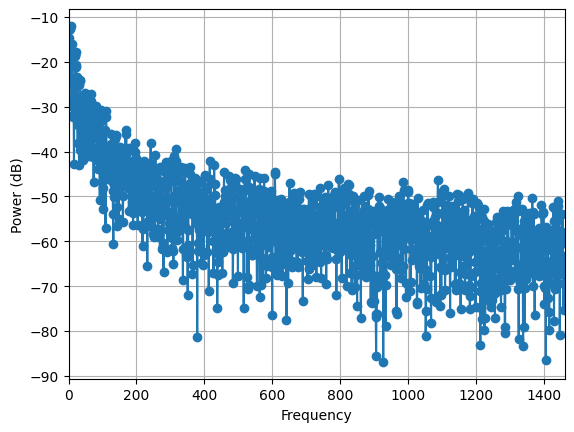

In [43]:
p3 = Periodogram(ma_diff, sampling=2923)
p3.run()
p3.plot(marker='o')

In [46]:
from scipy.fft import fftfreq 
import numpy as np

c:\Users\igor\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\igor\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


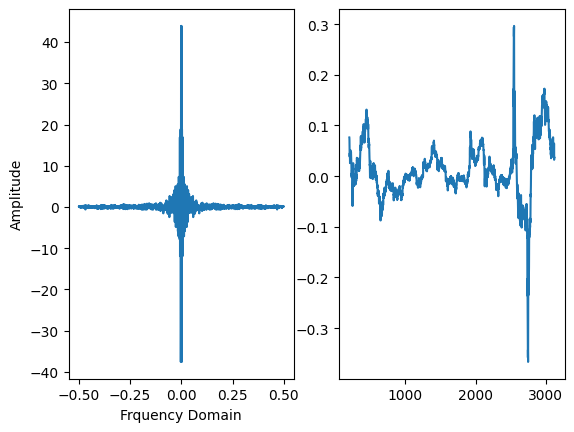

In [50]:
s = ma_diff
fft = np.fft.fft(s)
fft[0] = 0
fftfreq = np.fft.fftfreq(len(s))

plt.subplot(1, 2, 1)
plt.xlabel("Frquency Domain")
plt.ylabel("Amplitude")
plt.plot(fftfreq, fft)
plt.subplot(1, 2, 2)
plt.plot(s)
plt.show()

c:\Users\igor\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\igor\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


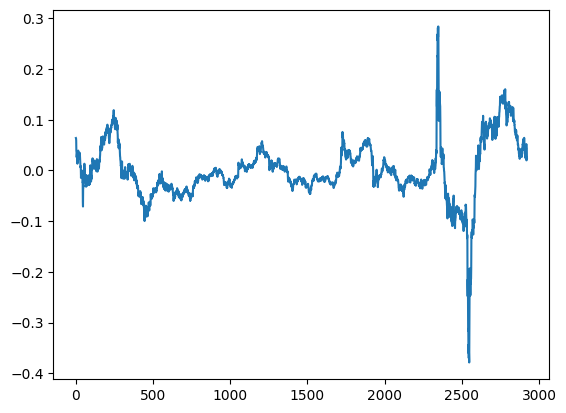

In [53]:
ifft = np.fft.ifft(fft)
plt.plot(ifft)

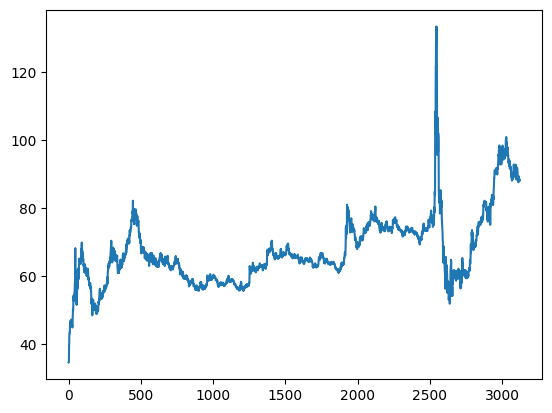

In [59]:
plt.plot(series)

c:\Users\igor\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\igor\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


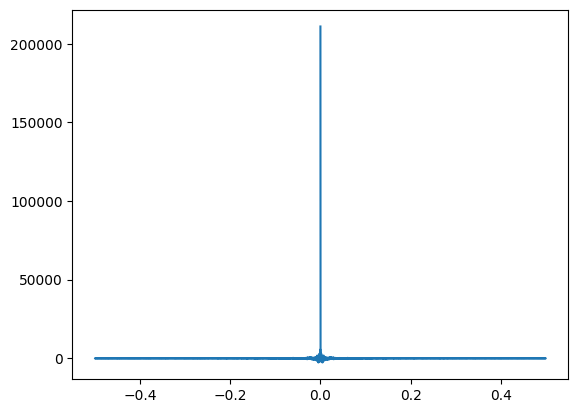

In [62]:
fft = np.fft.fft(series)
fftfreq = np.fft.fftfreq(len(series))
plt.plot(fftfreq, fft)